# **Project Name : Cardiovascular Risk Prediction : Classification**

### **Data Fields :**
*   Sex: male or female("M" or "F")

* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

*   Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)

*   BP Meds: whether or not the patient was on blood pressure medication (Nominal)

*   Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

*   Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*   Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)
*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)
*   Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
*   Glucose: glucose level (Continuous) Predict variable (desired target)
10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

  



###**Project Summary** :
The objective of this project was to utilize machine learning methods to predict the likelihood of coronary heart disease (CHD) in patients over a span of 10 years. The project utilized data from an ongoing cardiovascular study conducted in Framingham, Massachusetts, which provided information on more than 4,000 patients and included 15 attributes representing potential risk factors for CHD. These factors encompassed demographics, behavior, and medical aspects.


### **Project Objectives :**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


In [327]:
# Import Libraries

import pandas as pd
import numpy as np
from datetime import datetime as dt
import math

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [328]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [329]:
df=pd.read_csv('/content/drive/MyDrive/Data/data_cardiovascular_risk.csv')

In [330]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [331]:
df.drop('id',axis=1,inplace=True)

In [332]:
# Dataset Rows & Columns count
df.shape

(3390, 16)

In [333]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [334]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [335]:
# Missing Values/Null Values Count
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [336]:
# Dataset Columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [337]:
# Dataset Describe
df.describe()

age    education   cigsPerDay       BPMeds  prevalentStroke  \
count  3390.000000  3303.000000  3368.000000  3346.000000      3390.000000   
mean     49.542183     1.970936     9.069477     0.029886         0.006490   
std       8.592878     1.019081    11.879078     0.170299         0.080309   
min      32.000000     1.000000     0.000000     0.000000         0.000000   
25%      42.000000     1.000000     0.000000     0.000000         0.000000   
50%      49.000000     2.000000     0.000000     0.000000         0.000000   
75%      56.000000     3.000000    20.000000     0.000000         0.000000   
max      70.000000     4.000000    70.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol       sysBP        diaBP  \
count   3390.000000  3390.000000  3352.000000  3390.00000  3390.000000   
mean       0.315339     0.025664   237.074284   132.60118    82.883038   
std        0.464719     0.158153    45.247430    22.29203    12.023581   
min        0.000000     0.000000   107.000000    83.50000    48.000000   
25%        0.000000     0.000000   206.000000   117.00000    74.500000   
50%        0.000000     0.000000   234.000000   128.50000    82.000000   
75%        1.000000     0.000000   264.000000   144.00000    90.000000   
max        1.000000     1.000000   696.000000   295.00000   142.500000   

               BMI    heartRate      glucose   TenYearCHD  
count  3376.000000  3389.000000  3086.000000  3390.000000  
mean     25.794964    75.977279    82.086520     0.150737  
std       4.115449    11.971868    24.244753     0.357846  
min      15.960000    45.000000    40.000000     0.000000  
25%      23.020000    68.000000    71.000000     0.000000  
50%      25.380000    75.000000    78.000000     0.000000  
75%      28.040000    83.000000    87.000000     0.000000  
max      56.800000   143.000000   394.000000     1.000000

In [338]:
df_1 = df.copy()

In [339]:
df_1.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [340]:
dependent_var = ['ten_year_chd']
categorical_var = [i for i in df_1.columns if df_1[i].nunique()<5]
numerical_var = [i for i in df_1.columns if i not in categorical_var]

In [341]:
print('dependent_var:',dependent_var,'\n','categorical_var:',categorical_var,'\n','numerical_var:',numerical_var)

dependent_var: ['ten_year_chd'] 
 categorical_var: ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd'] 
 numerical_var: ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']


## **Data Visualization**

0    2879
1     511
Name: ten_year_chd, dtype: int64


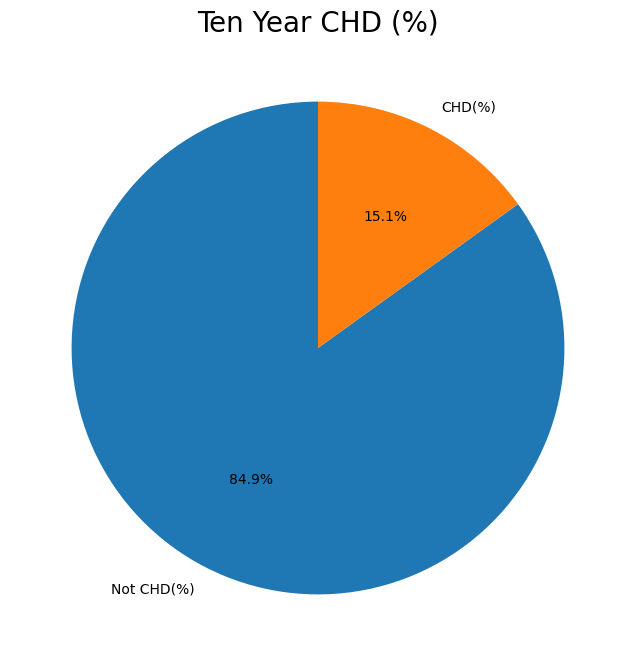

In [342]:
print(df_1['ten_year_chd'].value_counts())

plt.figure(figsize=(12,8))
plt.pie(df_1['ten_year_chd'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=90, autopct="%1.1f%%")
plt.title('Ten Year CHD (%)', fontsize=20)
plt.show()



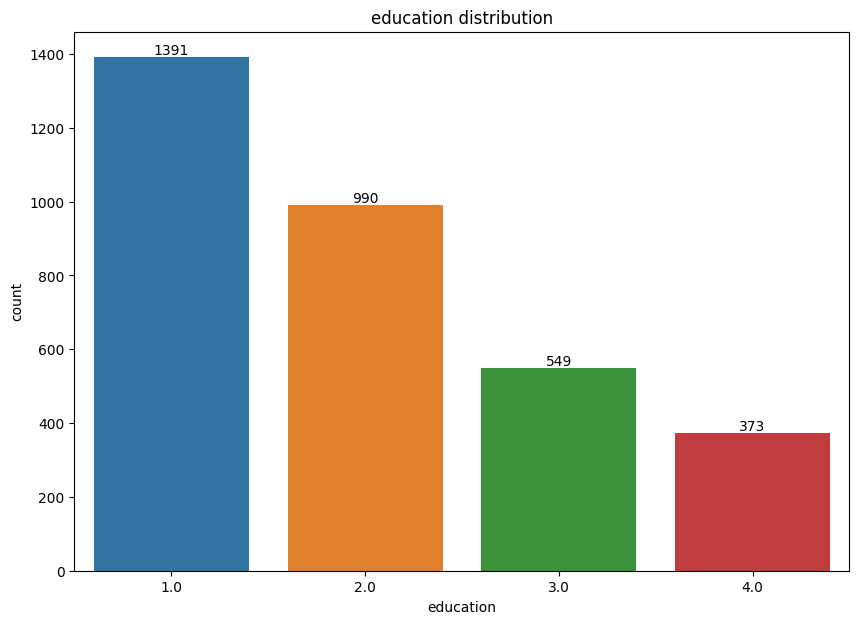

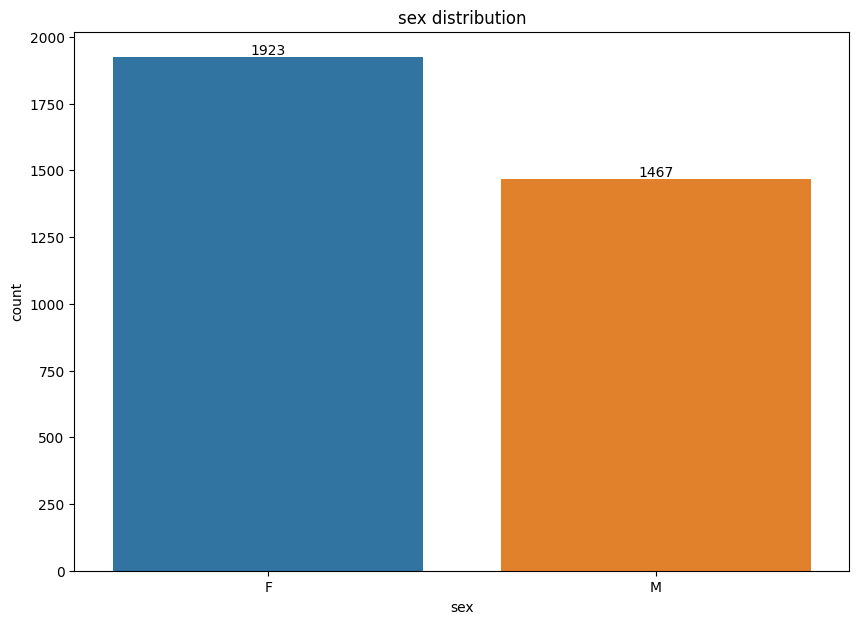

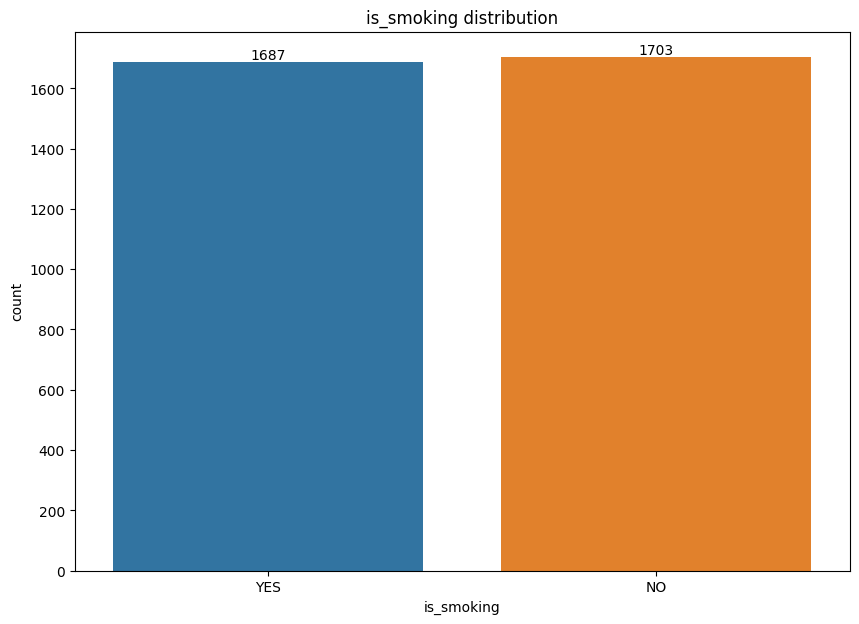

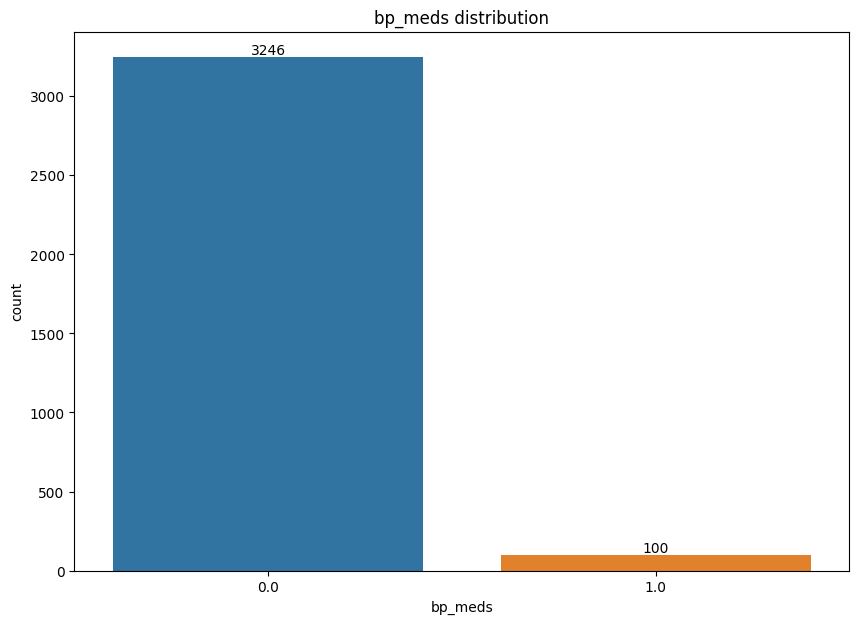

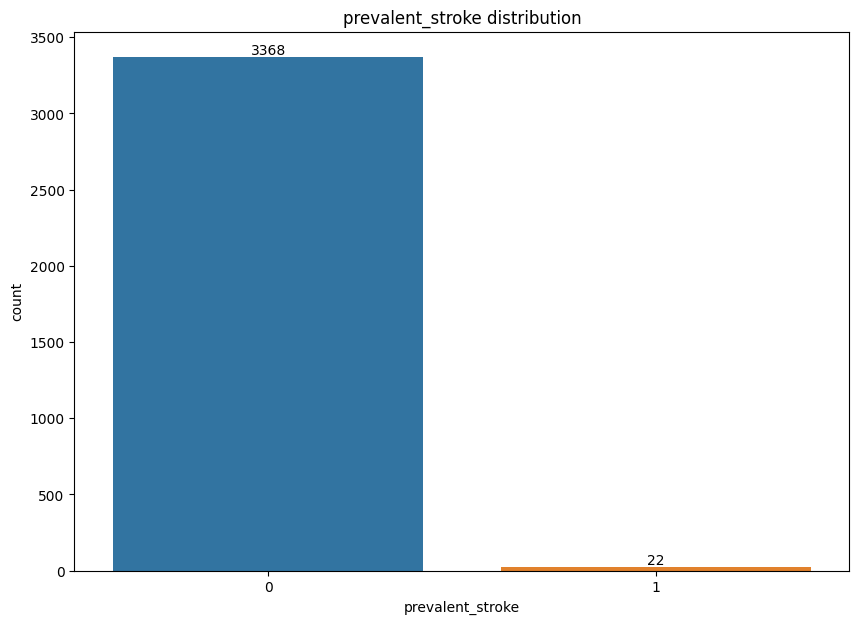

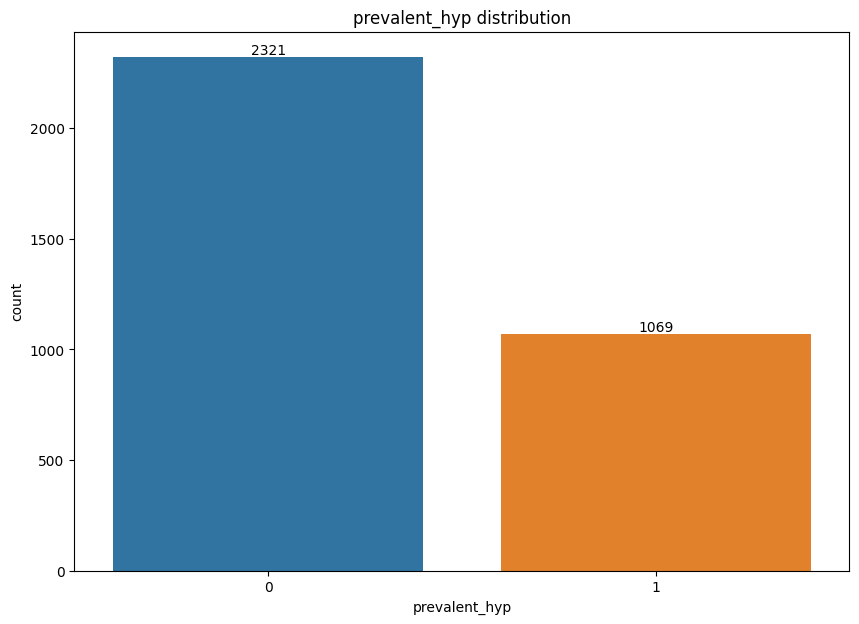

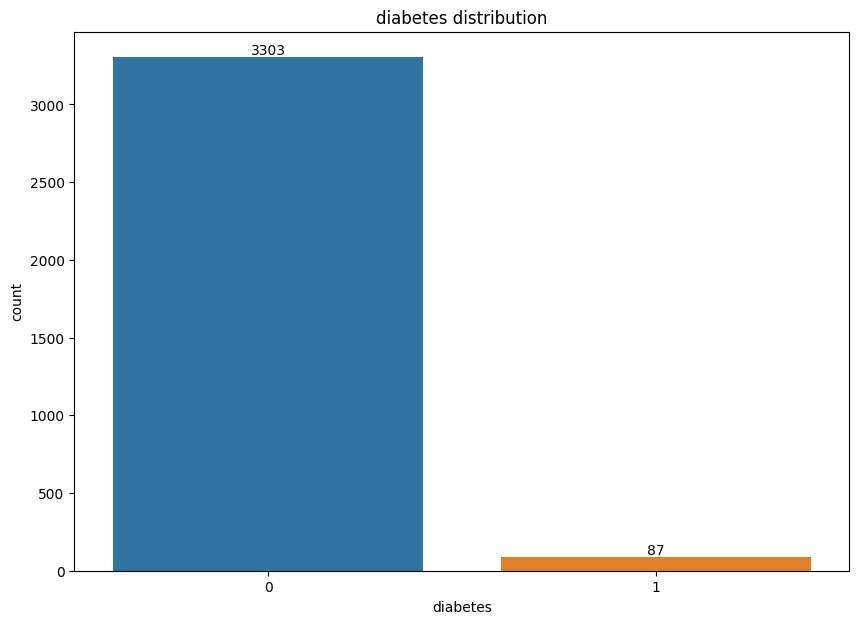

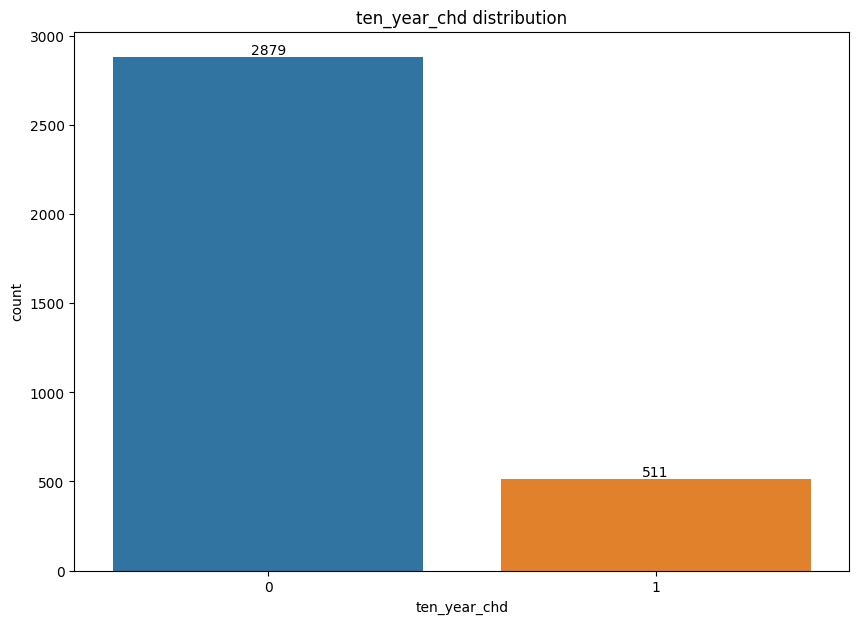

In [343]:
for i in categorical_var:
  plt.figure(figsize=(10,7))
  ax=sns.countplot(x=i,data=df_1)
  for label in ax.containers:
    ax.bar_label(label)
  plt.xlabel(i)
  plt.title(i+' distribution')
  plt.show()

<ipython-input-344-7ec20b82862b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_1.corr()


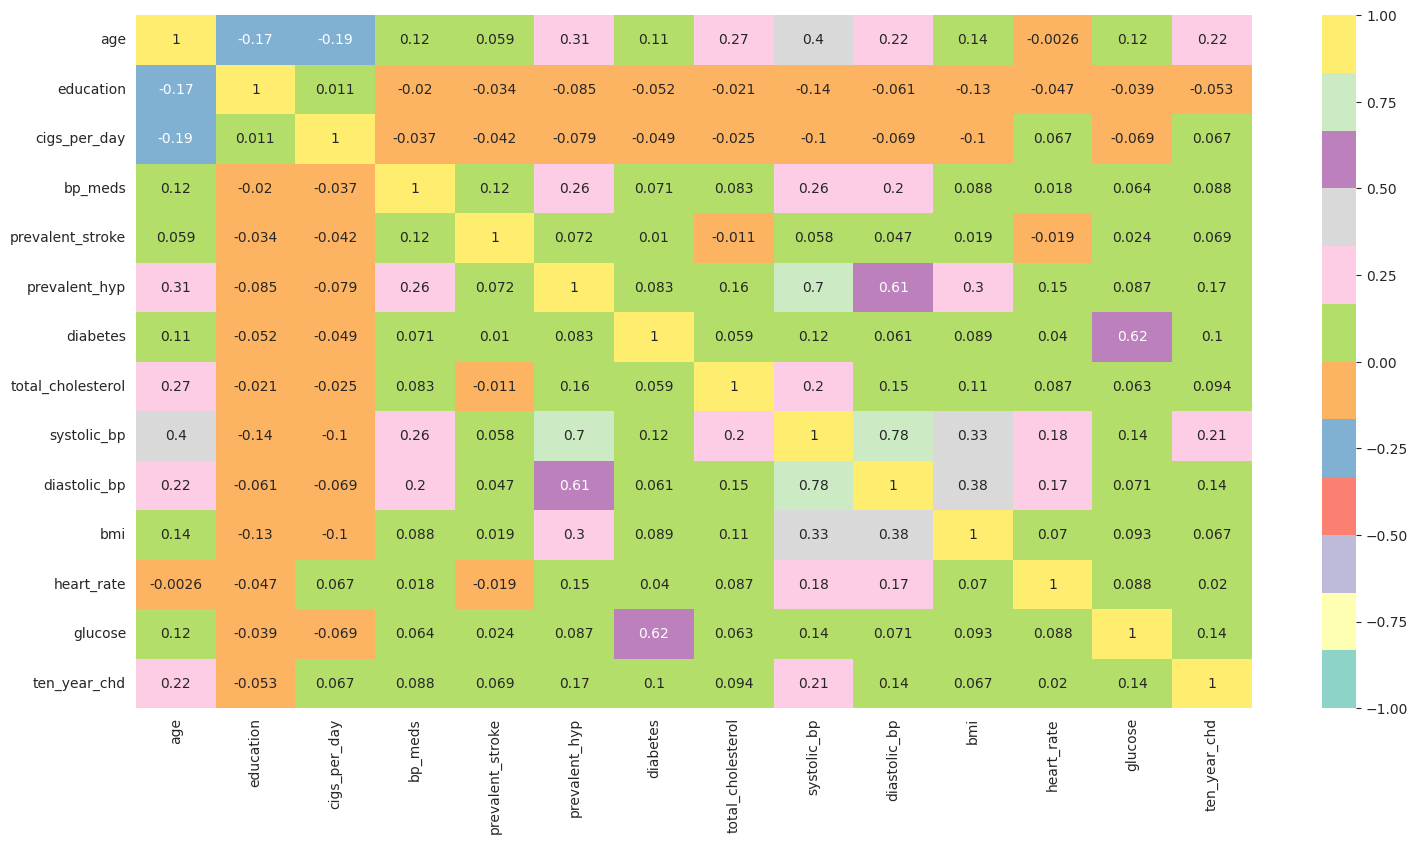

In [344]:
corr = df_1.corr()
mask = np.zeros_like(corr)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="Set3")


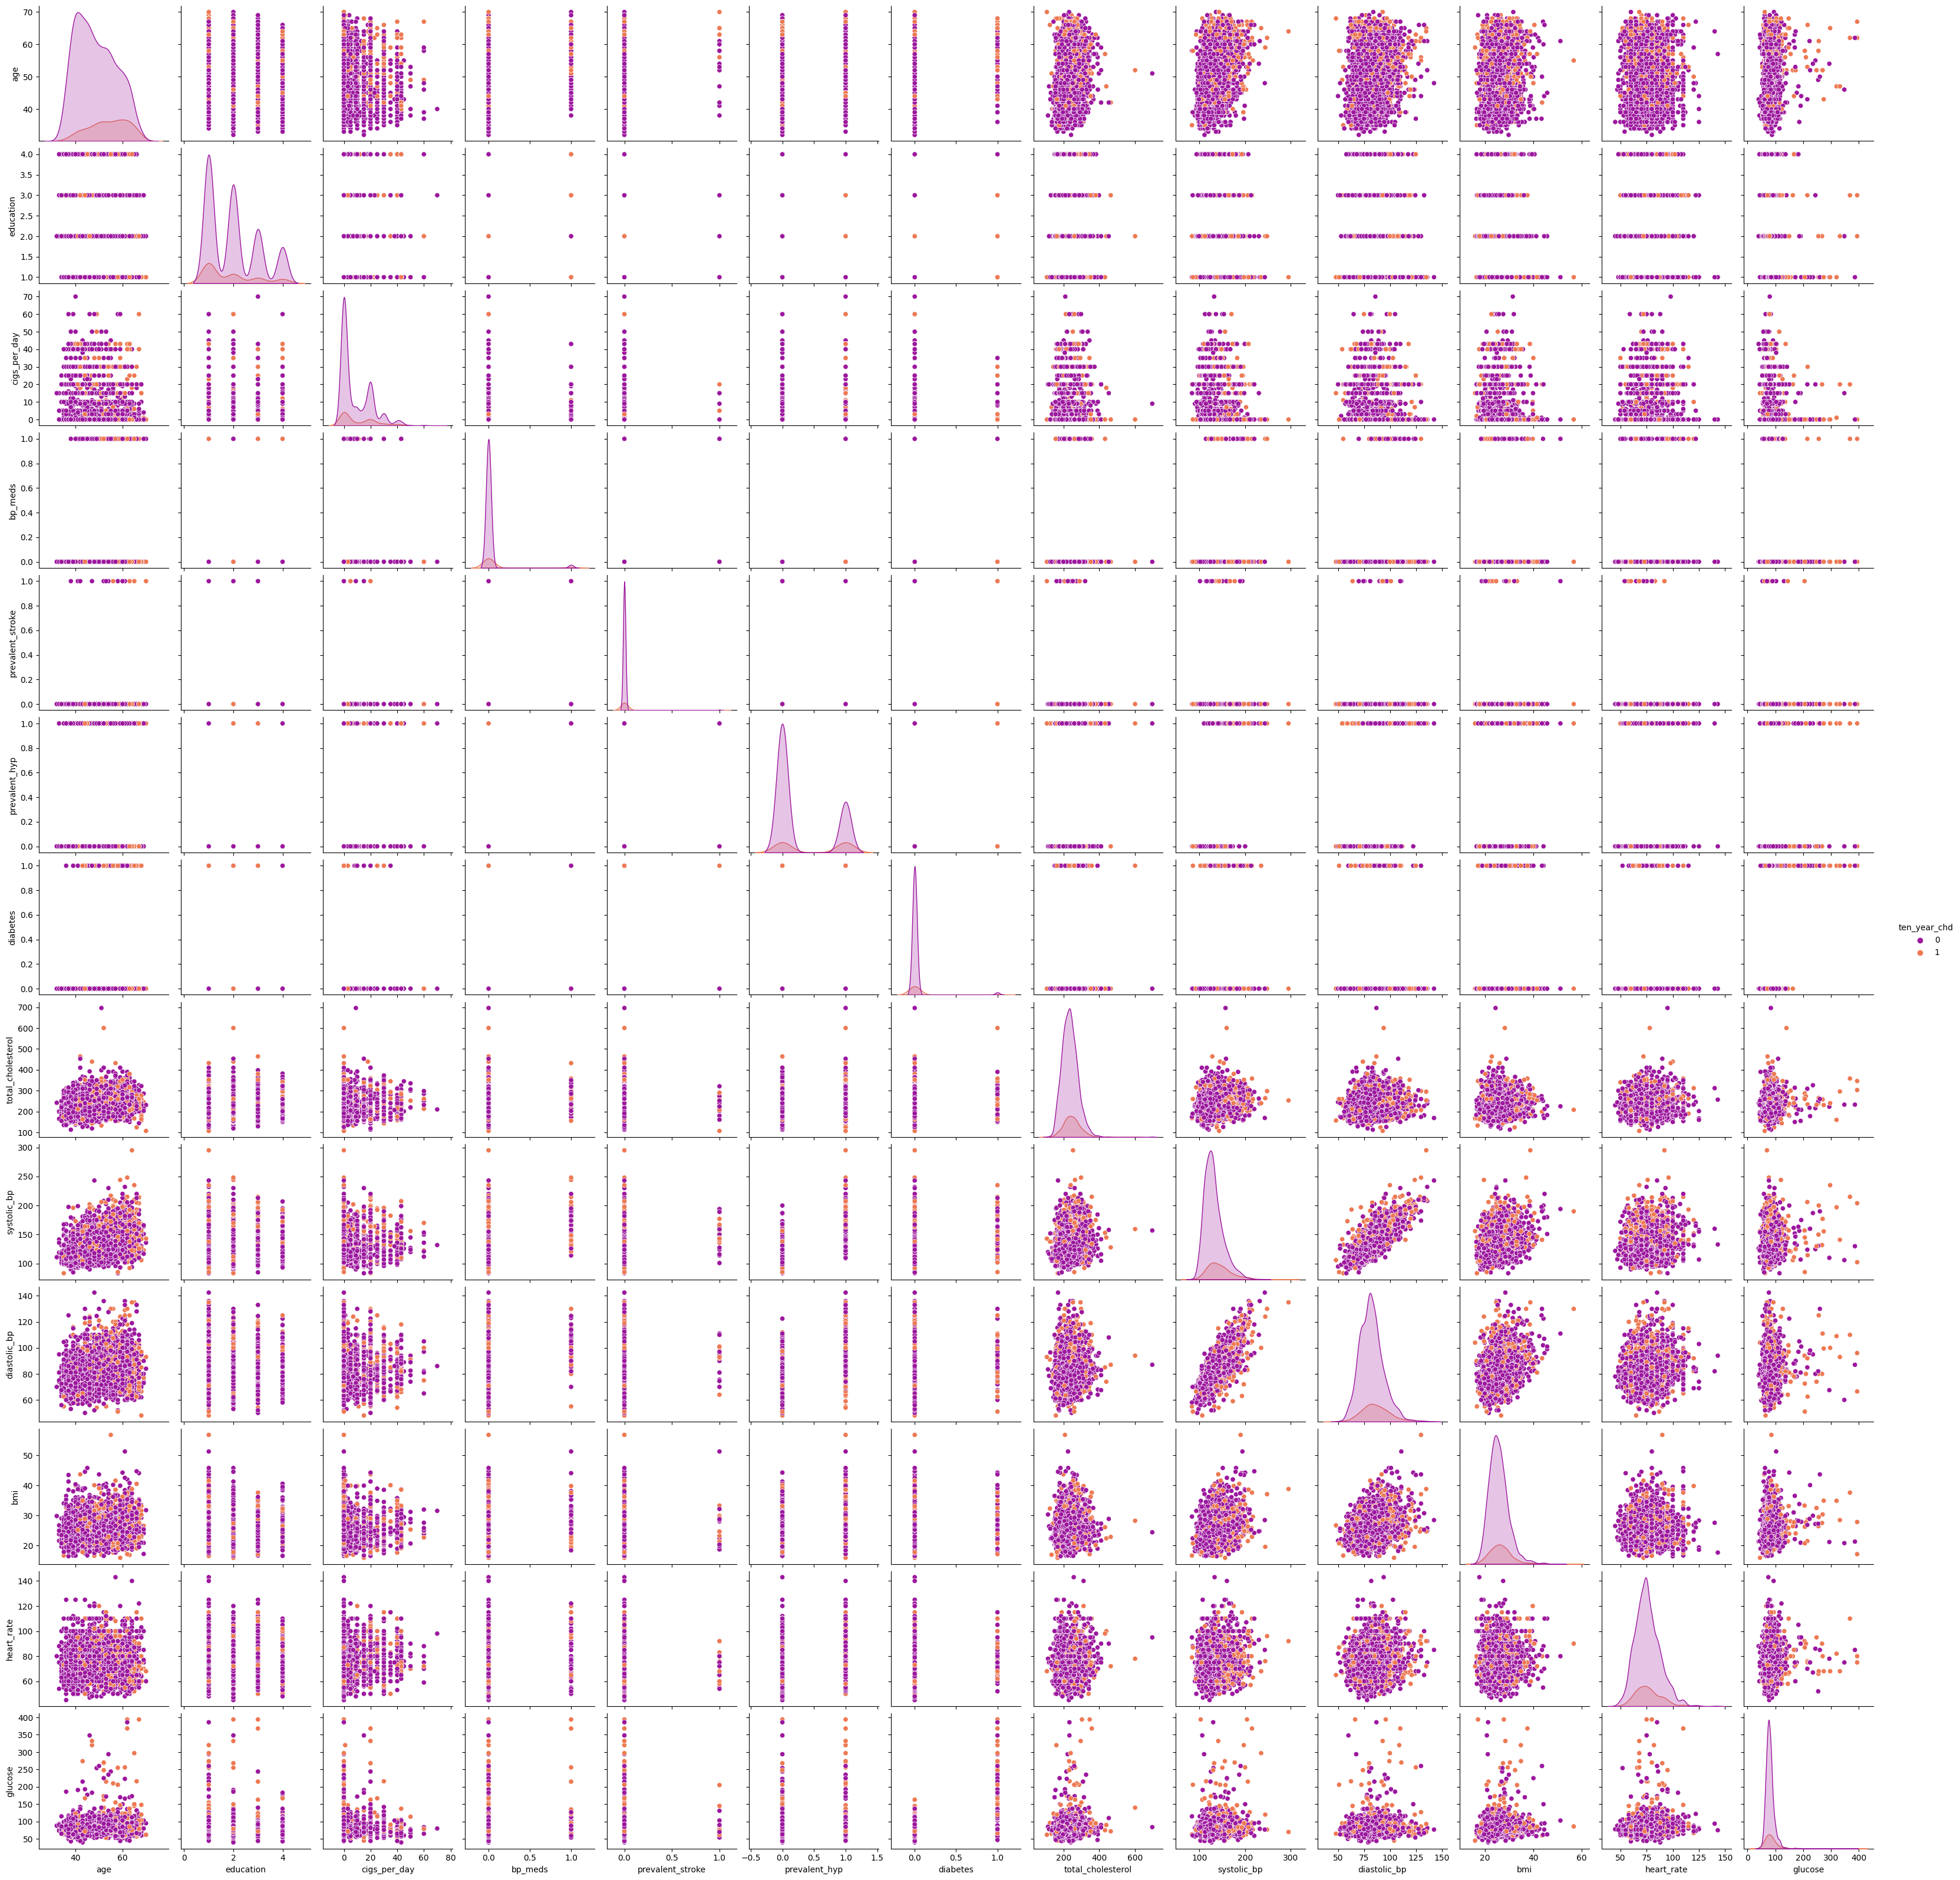

In [345]:
sns.pairplot(df_1,hue="ten_year_chd",palette='plasma')
plt.show()

In [346]:
# Handling missing values
df_1['bp_meds'] = df_1['bp_meds'].fillna(df_1['bp_meds'].mode()[0])

In [347]:
# Mean and median number of cigarettes per day
df_1.cigs_per_day.mean().round(0),df_1.cigs_per_day.median()

(9.0, 0.0)

In [348]:
# All missing values in the cigs_per_day column
df_1[df_1['cigs_per_day'].isna()]

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
422    55        1.0   F        YES           NaN      0.0                 0   
466    45        3.0   M        YES           NaN      0.0                 0   
469    42        1.0   M        YES           NaN      0.0                 0   
491    61        1.0   F        YES           NaN      0.0                 0   
538    41        1.0   F        YES           NaN      0.0                 0   
767    54        1.0   M        YES           NaN      0.0                 0   
1461   47        2.0   F        YES           NaN      0.0                 0   
1467   49        1.0   F        YES           NaN      0.0                 0   
1597   57        NaN   F        YES           NaN      0.0                 0   
1986   49        2.0   F        YES           NaN      0.0                 0   
2031   58        4.0   F        YES           NaN      0.0                 0   
2087   49        4.0   M        YES           NaN      0.0                 0   
2240   47        3.0   F        YES           NaN      0.0                 0   
2284   45        2.0   M        YES           NaN      0.0                 0   
2527   58        2.0   M        YES           NaN      0.0                 0   
2638   57        NaN   M        YES           NaN      0.0                 0   
2648   39        2.0   M        YES           NaN      0.0                 0   
2723   43        4.0   M        YES           NaN      0.0                 0   
2879   42        1.0   M        YES           NaN      0.0                 0   
2945   53        2.0   M        YES           NaN      0.0                 0   
3301   55        1.0   M        YES           NaN      0.0                 0   
3378   39        3.0   F        YES           NaN      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
422               1         0              213.0        163.0          91.0   
466               1         0              170.0        145.5          99.0   
469               0         0              196.0        123.0          73.0   
491               1         0              356.0        168.0          98.0   
538               0         0              171.0        135.0          82.5   
767               0         0              219.0        110.0          72.0   
1461              0         0              365.0        127.0          76.0   
1467              0         0              252.0        123.0          69.0   
1597              0         0              229.0        115.0          69.0   
1986              1         0              233.0        158.0         102.0   
2031              1         0              270.0        195.0         117.5   
2087              0         0              256.0        127.5          81.5   
2240              0         0              321.0        132.0          88.0   
2284              0         0              248.0        121.0          72.0   
2527              0         0              235.0        127.5          76.0   
2638              0         0              223.0        107.5          72.5   
2648              0         0              285.0        121.0          82.0   
2723              0         0              222.0        109.5          69.0   
2879              0         0              226.0        119.0          80.0   
2945              0         0              276.0        130.0          86.0   
3301              0         0              214.0        132.5          85.5   
3378              0         0              197.0        126.5          76.5   

        bmi  heart_rate  glucose  ten_year_chd  
422   28.66        69.0     66.0             0  
466   26.74        83.0     85.0             0  
469   22.06        66.0      NaN             0  
491   27.30       103.0    106.0             0  
538   24.35        79.0     82.0             0  
767   26.05        95.0     86.0             0  
1461

In [349]:
# Imputing the missing values in the cigs_per_day
df_1['cigs_per_day'] = df_1['cigs_per_day'].fillna(df_1[df_1['is_smoking']=='YES']['cigs_per_day'].median())

In [350]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df_1['total_cholesterol'] = df_1['total_cholesterol'].fillna(df_1['total_cholesterol'].median())
df_1['bmi'] = df_1['bmi'].fillna(df_1['bmi'].median())
df_1['heart_rate'] = df_1['heart_rate'].fillna(df_1['heart_rate'].median())

In [351]:
# total missing values in glucose
df_1.glucose.isna().sum()

304

In the glucose column, 304 data points are missing. Using the mean or median to fill in these values could introduce significant inaccuracies. To counteract this, the KNN imputer method could be employed to replace the missing data.

In [352]:
# Highly positively skewed
df_1.glucose.skew()

6.1443896544049394

In [353]:
# Replacing the string values of the categorical  column with 0 and 1

df_1['sex'] = np.where(df_1['sex'] == 'M',1,0)
df_1['is_smoking'] = np.where(df_1['is_smoking'] == 'YES',1,0)

In [354]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=6)
imputed = imputer.fit_transform(df_1)
df_1 = pd.DataFrame(imputed, columns=df_1.columns)


In [355]:
# checking for missing values
df_1.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

In [356]:
numerical_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [357]:
# Handling Outliers & Outlier treatments
for col in numerical_var:
  q1=df_1[col].quantile(0.25)
  q3=df_1[col].quantile(0.75)
  IQR=q3 - q1
  lower_limit=q1 - 1.5*IQR
  upper_limit=q3 + 1.5*IQR
  df_1[col]=np.where(df_1[col]>upper_limit,upper_limit,np.where(df_1[col]<lower_limit,lower_limit,df_1[col]))

In [358]:
#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif=pd.DataFrame()
  vif['variables']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif

In [359]:
calc_vif(df_1[numerical_var])

variables         VIF
0                age   42.841786
1       cigs_per_day    1.641411
2  total_cholesterol   33.355425
3        systolic_bp  124.492667
4       diastolic_bp  135.503517
5                bmi   50.078490
6         heart_rate   40.628755
7            glucose   39.114565

In [360]:
# Creating a new column pulse_pressure and dropping systolic_bp and diastolic_bp

df_1['pulse_pressure'] = df_1['systolic_bp']-df_1['diastolic_bp']
df_1.drop('systolic_bp',axis=1,inplace=True)
df_1.drop('diastolic_bp',axis=1,inplace=True)

In [361]:
# Updating the numrical_var list

numerical_var.remove('systolic_bp')
numerical_var.remove('diastolic_bp')
numerical_var.append('pulse_pressure')

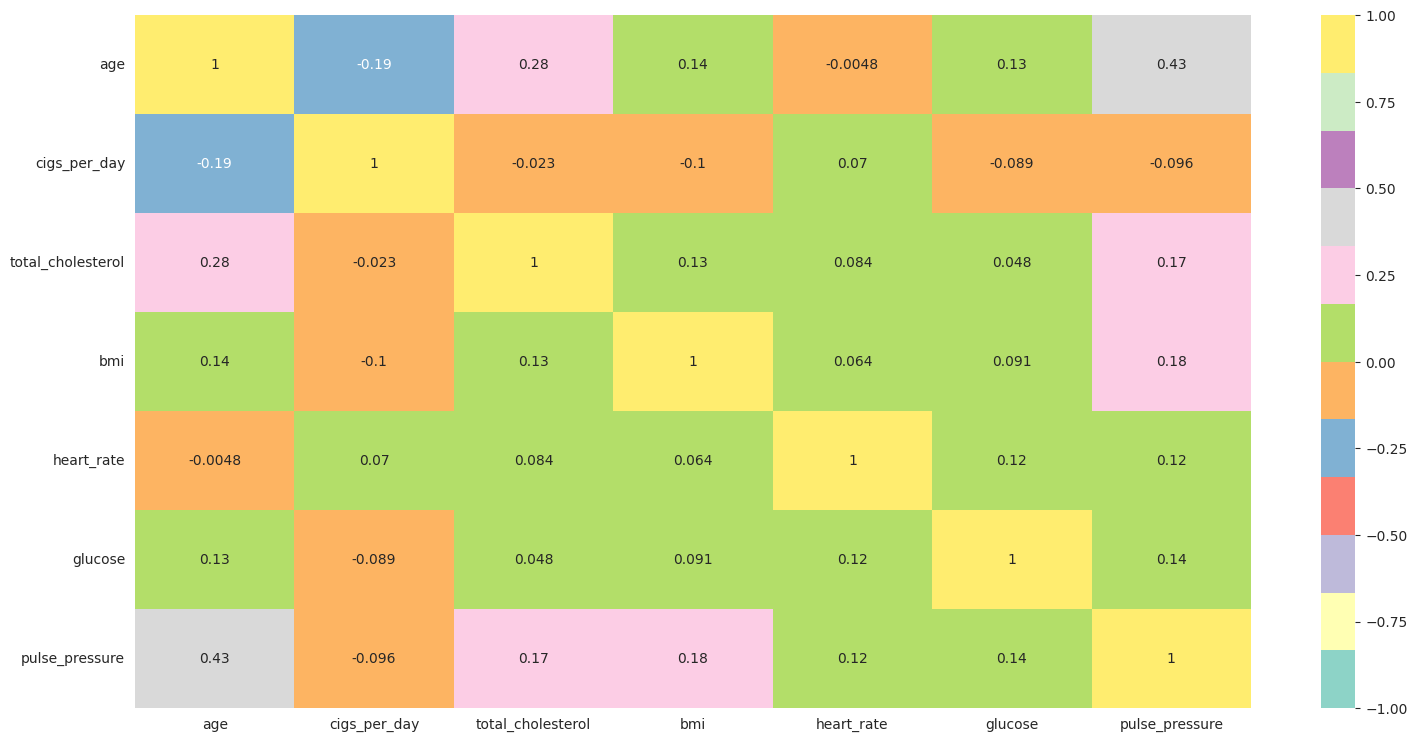

In [362]:
corr = df_1[numerical_var].corr()

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , vmin = -1,vmax=1, annot = True, cmap="Set3")


In [363]:
# Select your features wisely to avoid overfitting
# dropping is_smoking
df_1.drop('is_smoking',axis=1,inplace=True)
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

In [364]:
# Transform Your data
df_1[numerical_var].skew()

age                  0.225796
cigs_per_day         1.127284
total_cholesterol    0.340533
bmi                  0.450492
heart_rate           0.418170
glucose              0.480727
pulse_pressure       0.946833
dtype: float64

In [365]:
#applying sqrt transformation on cigs_per_day and pulse_pressure because both of the columns are lightly skewed while rest of the columns are close to normal
df_1['cigs_per_day']= np.sqrt(df_1['cigs_per_day'])
df_1['pulse_pressure'] = np.sqrt(df_1['pulse_pressure'])


In [366]:
# Scaling your data
scaler=StandardScaler()
df_1_numerical_scaled=scaler.fit_transform(df_1[numerical_var])

In [367]:
features = [i for i in df_1.columns if i not in ['ten_year_chd']]
features

['age',
 'education',
 'sex',
 'cigs_per_day',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure']

In [368]:
# Create a new dataframe with the scaled numerical columns
df_1_numerical_scaled = pd.DataFrame(df_1_numerical_scaled, columns=numerical_var)

# Combine the scaled numerical columns with the categorical columns
df_scaled=pd.concat([df_1_numerical_scaled, df_1.drop(numerical_var, axis=1)],axis=1)

In [369]:
df_scaled

age  cigs_per_day  total_cholesterol       bmi  heart_rate  \
0     1.682783     -0.131026          -0.362779 -0.085301    1.226815   
1    -1.576210     -0.904920          -0.572897  1.066765   -0.332741   
2    -0.412284      0.508011           0.314268 -1.405321    1.053531   
3     0.053287      1.093267          -0.082622  0.670496   -0.679309   
4     1.682783      1.542349           0.104150  0.187626   -0.506025   
...        ...           ...                ...       ...         ...   
3385  1.217213     -0.904920           0.571079  0.938174   -0.506025   
3386 -0.412284     -0.904920          -0.876401 -0.982809    0.360395   
3387 -0.645069     -0.131026           2.672259  0.843700   -0.246099   
3388  1.217213     -0.904920          -1.063172 -0.707258    0.360395   
3389  0.518857     -0.904920           1.201433  1.095632    0.273753   

       glucose  pulse_pressure  education  sex  bp_meds  prevalent_stroke  \
0     0.007209        1.023762        2.0  0.0      0.0               0.0   
1    -0.406284        1.474850        4.0  1.0      0.0               0.0   
2     1.164989       -0.267527        1.0  0.0      0.0               0.0   
3     1.164989        1.474850        1.0  1.0      0.0               0.0   
4    -0.240887        0.224326        1.0  0.0      0.0               0.0   
...        ...             ...        ...  ...      ...               ...   
3385  1.909276       -0.306792        1.0  0.0      0.0               0.0   
3386  0.338003       -0.189648        1.0  0.0      0.0               0.0   
3387 -0.654380        0.169223        3.0  1.0      0.0               0.0   
3388  0.420702        0.957313        1.0  1.0      0.0               0.0   
3389  0.999592       -0.112610        3.0  0.0      0.0               0.0   

      prevalent_hyp  diabetes  ten_year_chd  
0               0.0       0.0           1.0  
1               1.0       0.0           0.0  
2               0.0       0.0           0.0  
3               1.0       0.0           1.0  
4               0.0       0.0           0.0  
...             ...       ...           ...  
3385            0.0       0.0           0.0  
3386            0.0       0.0           0.0  
3387            1.0       0.0           1.0  
3388            1.0       0.0           0.0  
3389            0.0       0.0           0.0  

[3390 rows x 14 columns]

In [370]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test split
X=df_scaled.drop('ten_year_chd',axis=1)
y=df_scaled['ten_year_chd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

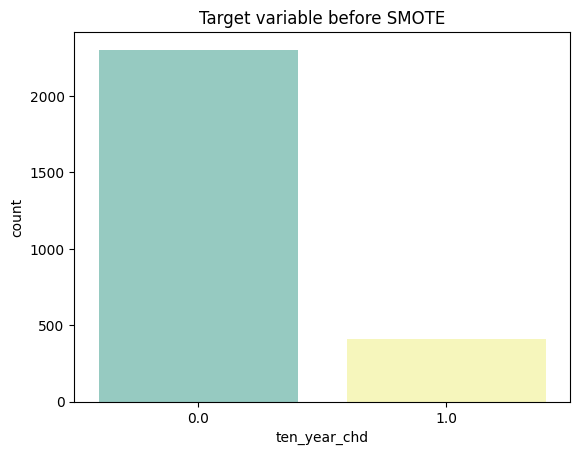

In [371]:
# Handling Imbalanced Dataset (If needed)
# visualize the target variable before SMOTE
sns.countplot(x=y_train,palette='Set3')
plt.title('Target variable before SMOTE')
plt.show()

Samples in the original dataset:  2712
Samples in the resampled dataset:  4588


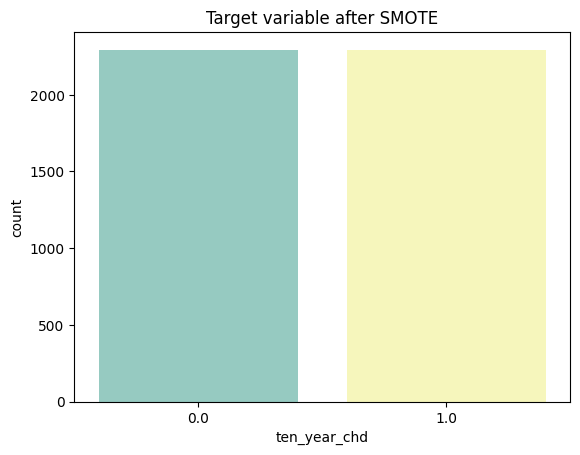

In [372]:
# Oversampling using SMOTETomek
smote=SMOTETomek(random_state=19)
X_smote,y_smote= smote.fit_resample(X_train,y_train)

print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))

# visualize the target variable after SMOTE
sns.countplot(x=y_smote,palette='Set3')
plt.title('Target variable after SMOTE')
plt.show()

## **Data Modelling & Training**

*   Logistic Regression

*   K Nearest Neighbour

*   Decision Tree

*   Random Forest Classifier


In [373]:
# creating list of matrix to store the evaluation matrix of all model
accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []

In [374]:
# defining the fuction to trian and evaluate the models
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)

    # get metrics
    preds = model.predict(X_test)
    print('\n================Evalution Matrix=========================\n')

    acc_score = accuracy_score(preds,y_test)
    print('accuracy_score:',acc_score)
    precision= precision_score(preds,y_test)
    print('precision_score:',precision)
    recall= recall_score(preds,y_test)
    print('recall_score:',recall)
    f1= f1_score(preds, y_test)
    print('f1_score:',f1)

    accuracy_score_list.append(acc_score)
    precision_score_list.append(precision)
    recall_score_list.append(recall)
    f1_score_list.append(f1)

    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



### **Logistic Regression**




================Evalution Matrix=========================

accuracy_score: 0.8569321533923304
precision_score: 0.049019607843137254
recall_score: 1.0
f1_score: 0.09345794392523364


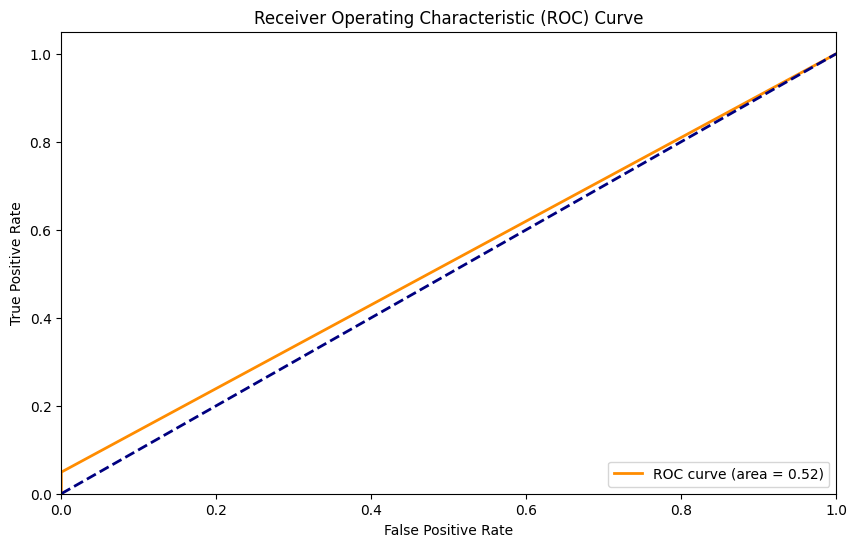

In [375]:
lr = LogisticRegression()
# calling run_model to train,fit and evaluate the lr model
run_model(lr,X_train,y_train,X_test,y_test)

### **K Nearest Neighbour**



================Evalution Matrix=========================

accuracy_score: 0.8407079646017699
precision_score: 0.11764705882352941
recall_score: 0.4
f1_score: 0.1818181818181818


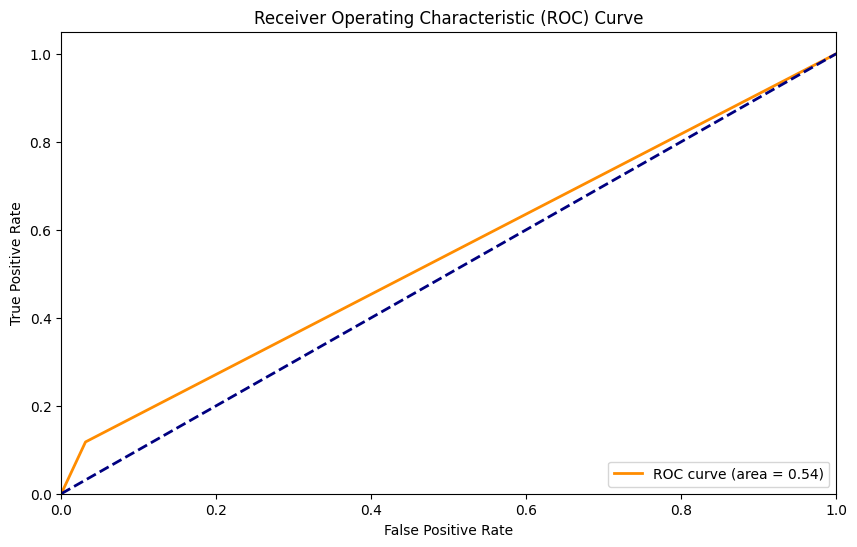

In [376]:
knn= KNeighborsClassifier()
# calling run_model to train,fit and evaluate the knn model
run_model(knn,X_train,y_train,X_test,y_test)

### **Decision Tree**




================Evalution Matrix=========================

accuracy_score: 0.7551622418879056
precision_score: 0.21568627450980393
recall_score: 0.2037037037037037
f1_score: 0.2095238095238095


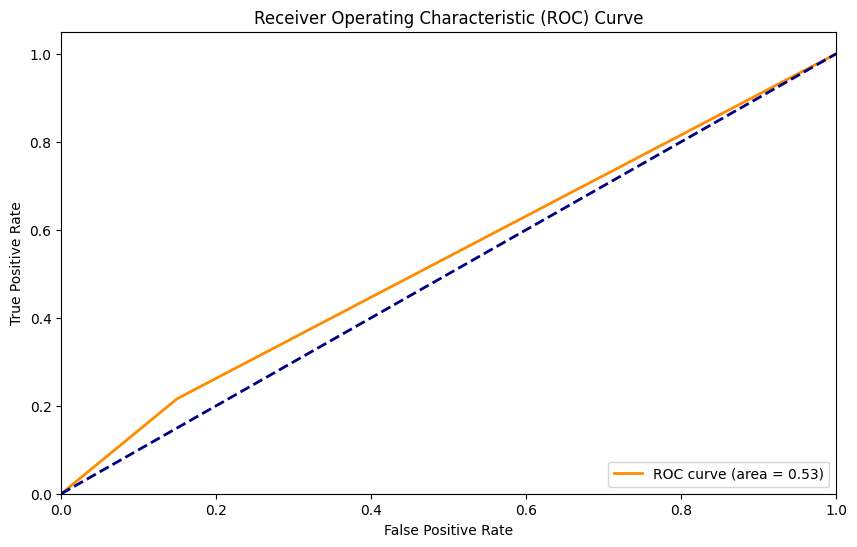

In [377]:
# calling run_model to train,fit and evaluate the dTree
dTree= DecisionTreeClassifier()
run_model(dTree,X_train,y_train,X_test,y_test)

### **Random Forest Classifier**


================Evalution Matrix=========================

accuracy_score: 0.8421828908554573
precision_score: 0.00980392156862745
recall_score: 0.14285714285714285
f1_score: 0.018348623853211007


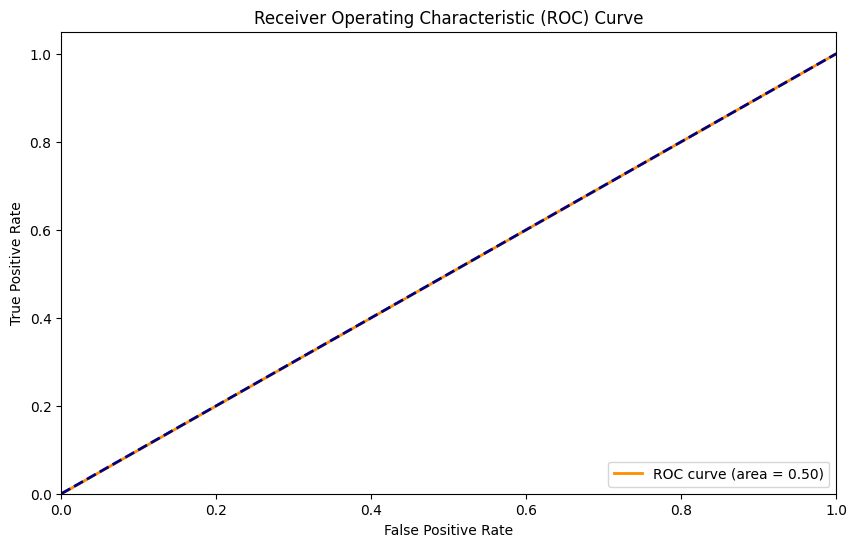

In [378]:
rf = RandomForestClassifier()
# calling run_model to train,fit and evaluate the rf model
run_model(rf,X_train,y_train,X_test,y_test)

In [379]:
model_name=['Logistic','K-Nearest_Neighbor','Decision_Tree','Random_forest_classifier']
original_model_matrice={'accuracy_score':accuracy_score_list,'precision_score':precision_score_list,'recall_score':recall_score_list,'f1_score':f1_score_list}
original_model_matrice


{'accuracy_score': [0.8569321533923304,
  0.8407079646017699,
  0.7551622418879056,
  0.8421828908554573],
 'precision_score': [0.049019607843137254,
  0.11764705882352941,
  0.21568627450980393,
  0.00980392156862745],
 'recall_score': [1.0, 0.4, 0.2037037037037037, 0.14285714285714285],
 'f1_score': [0.09345794392523364,
  0.1818181818181818,
  0.2095238095238095,
  0.018348623853211007]}

In [380]:
# converting dictionary to dataframe for easy visual
matrice_df=pd.DataFrame.from_dict(original_model_matrice,orient="index",columns=model_name)
matrice_df

Logistic  K-Nearest_Neighbor  Decision_Tree  \
accuracy_score   0.856932            0.840708       0.755162   
precision_score  0.049020            0.117647       0.215686   
recall_score     1.000000            0.400000       0.203704   
f1_score         0.093458            0.181818       0.209524   

                 Random_forest_classifier  
accuracy_score                   0.842183  
precision_score                  0.009804  
recall_score                     0.142857  
f1_score                         0.018349

In [381]:
matrice_df = matrice_df.T
matrice_df


accuracy_score  precision_score  recall_score  \
Logistic                        0.856932         0.049020      1.000000   
K-Nearest_Neighbor              0.840708         0.117647      0.400000   
Decision_Tree                   0.755162         0.215686      0.203704   
Random_forest_classifier        0.842183         0.009804      0.142857   

                          f1_score  
Logistic                  0.093458  
K-Nearest_Neighbor        0.181818  
Decision_Tree             0.209524  
Random_forest_classifier  0.018349

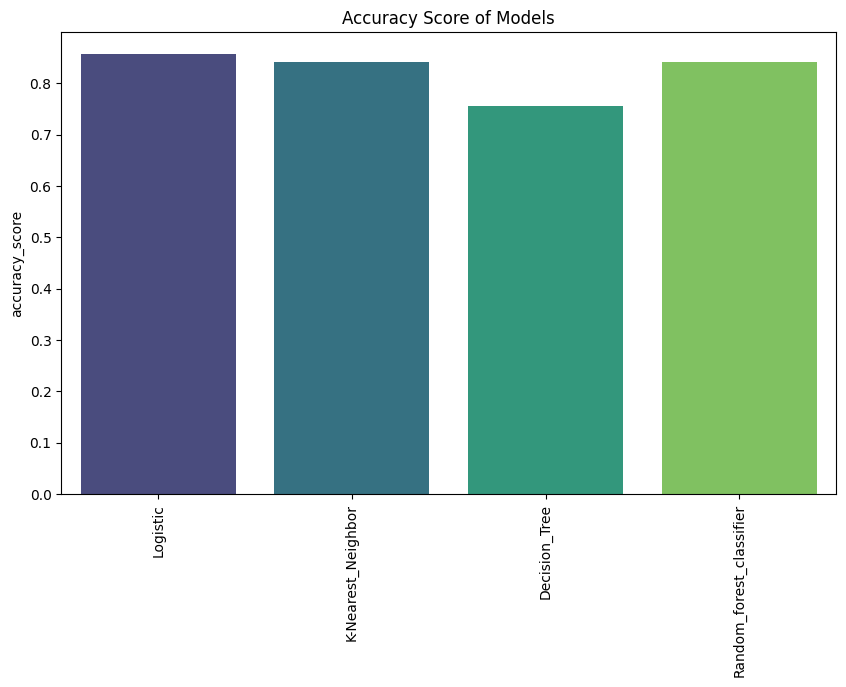

In [392]:
# accuracy score plot
plt.figure(figsize=(10, 6))
sns.barplot(x=matrice_df.index, y='accuracy_score', data=matrice_df, palette="viridis").set(title='Accuracy Score of Models')
plt.xticks(rotation=90)
plt.show()

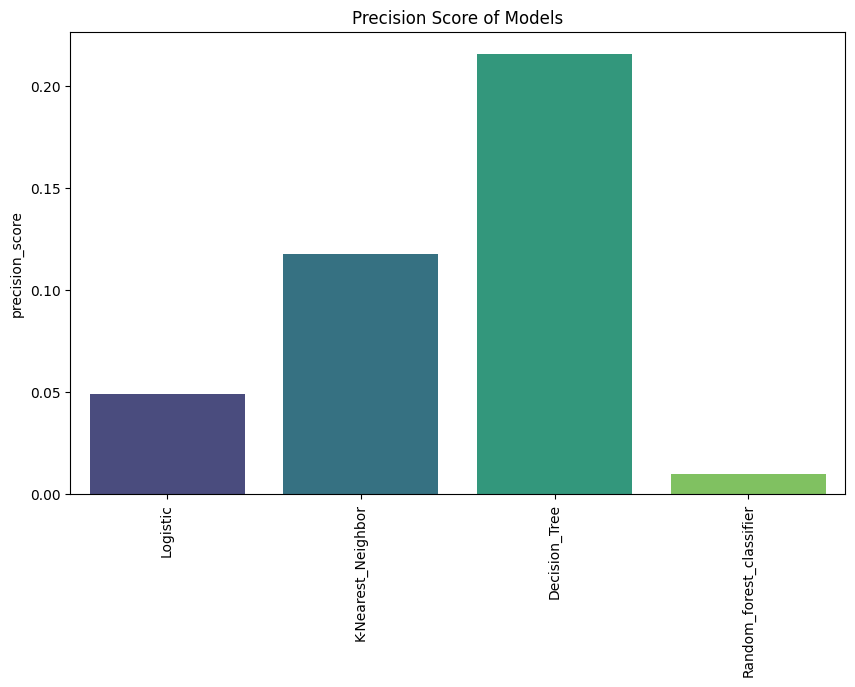

In [393]:
# precision score plot
plt.figure(figsize=(10, 6))
sns.barplot(x=matrice_df.index, y='precision_score', data=matrice_df, palette="viridis").set(title='Precision Score of Models')
plt.xticks(rotation=90)
plt.show()

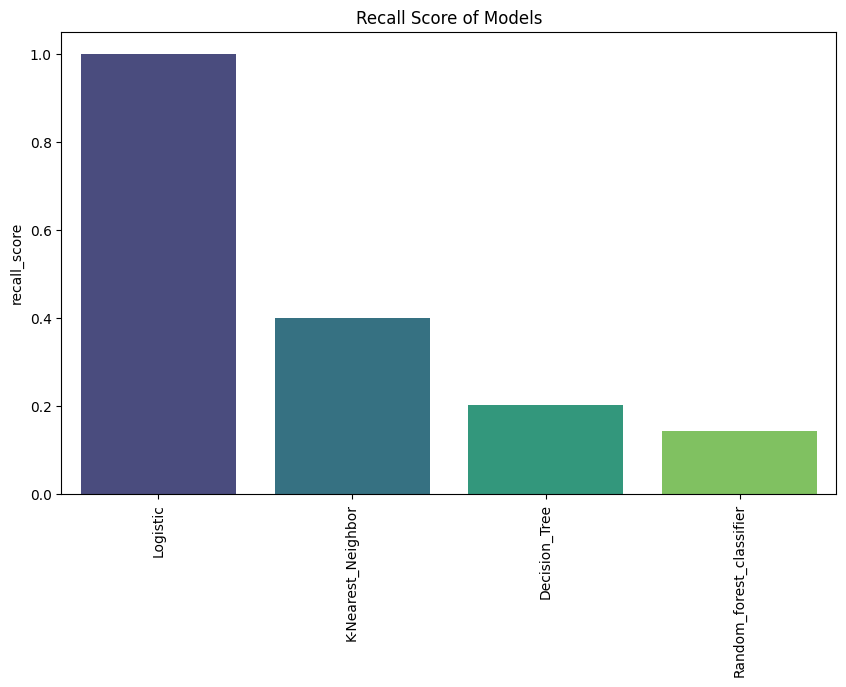

In [394]:
# recall score plot
plt.figure(figsize=(10, 6))
sns.barplot(x=matrice_df.index, y='recall_score', data=matrice_df, palette="viridis").set(title='Recall Score of Models')
plt.xticks(rotation=90)
plt.show()

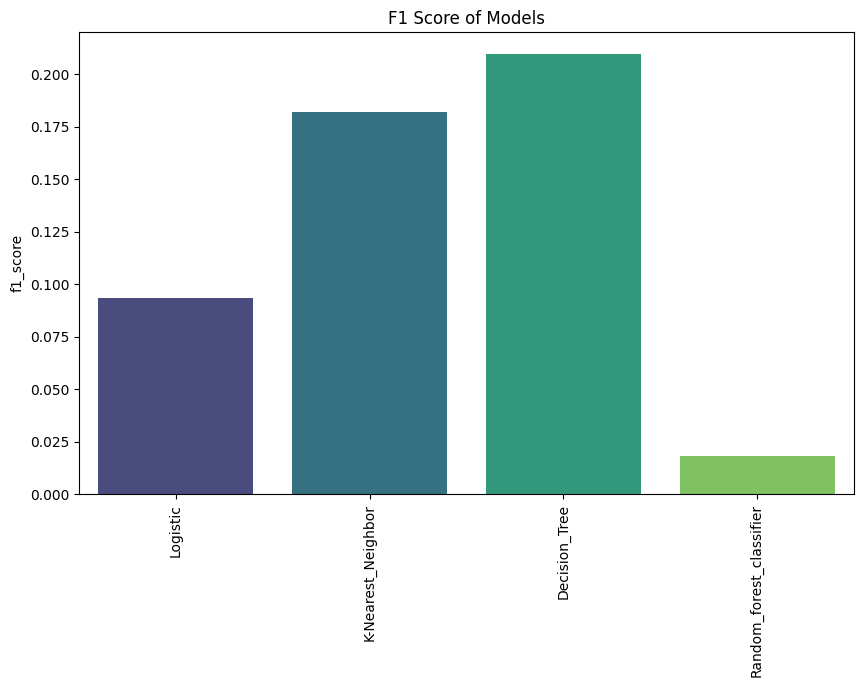

In [395]:
# f1 score plot
plt.figure(figsize=(10, 6))
sns.barplot(x=matrice_df.index, y='f1_score', data=matrice_df, palette="viridis").set(title='F1 Score of Models')
plt.xticks(rotation=90)
plt.show()

**Out of the four models tested on the data, the Decision Tree model performed the best, showing the highest F1 Score on the test data. This means it did a slightly better job of understanding the patterns in the test data compared to the other models. However, it's important to think about other things like cross-validation and trade-offs when choosing the best model. The decision should be based on what you specifically want and need, and on how each model behaves with new data, to make a smarter choice.**